# Setting up the enviornment

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score
from sklearn.metrics import fbeta_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score,fbeta_score, precision_score, recall_score, accuracy_score

In [2]:
sns.set_palette(sns.color_palette("Set3", 15))

In [3]:
original = pd.read_csv(r'/Users/minz/Desktop/JA/Portfolio/Quicken Loans/DSA Data Set.csv')

In [4]:
pd.set_option('max_columns', None)

# DATA CLEANINESS CHECK

In [5]:
original.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

In [7]:
original['y_binary'] = original.apply(lambda row: 1 if (row.y == 'yes') else 0, axis = 1)
#original.drop(['y'],axis = 1, inplace = True)
original.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,y_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,0


In [8]:
original.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
y_binary           0
dtype: int64

In [9]:
original.describe().round(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y_binary
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0,0.9,0.1
std,10.4,259.3,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3,0.1,0.3
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6,0.3,0.0
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1,0.9,0.0
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0,0.9,0.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1,1.0,0.0
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1,1.0,1.0


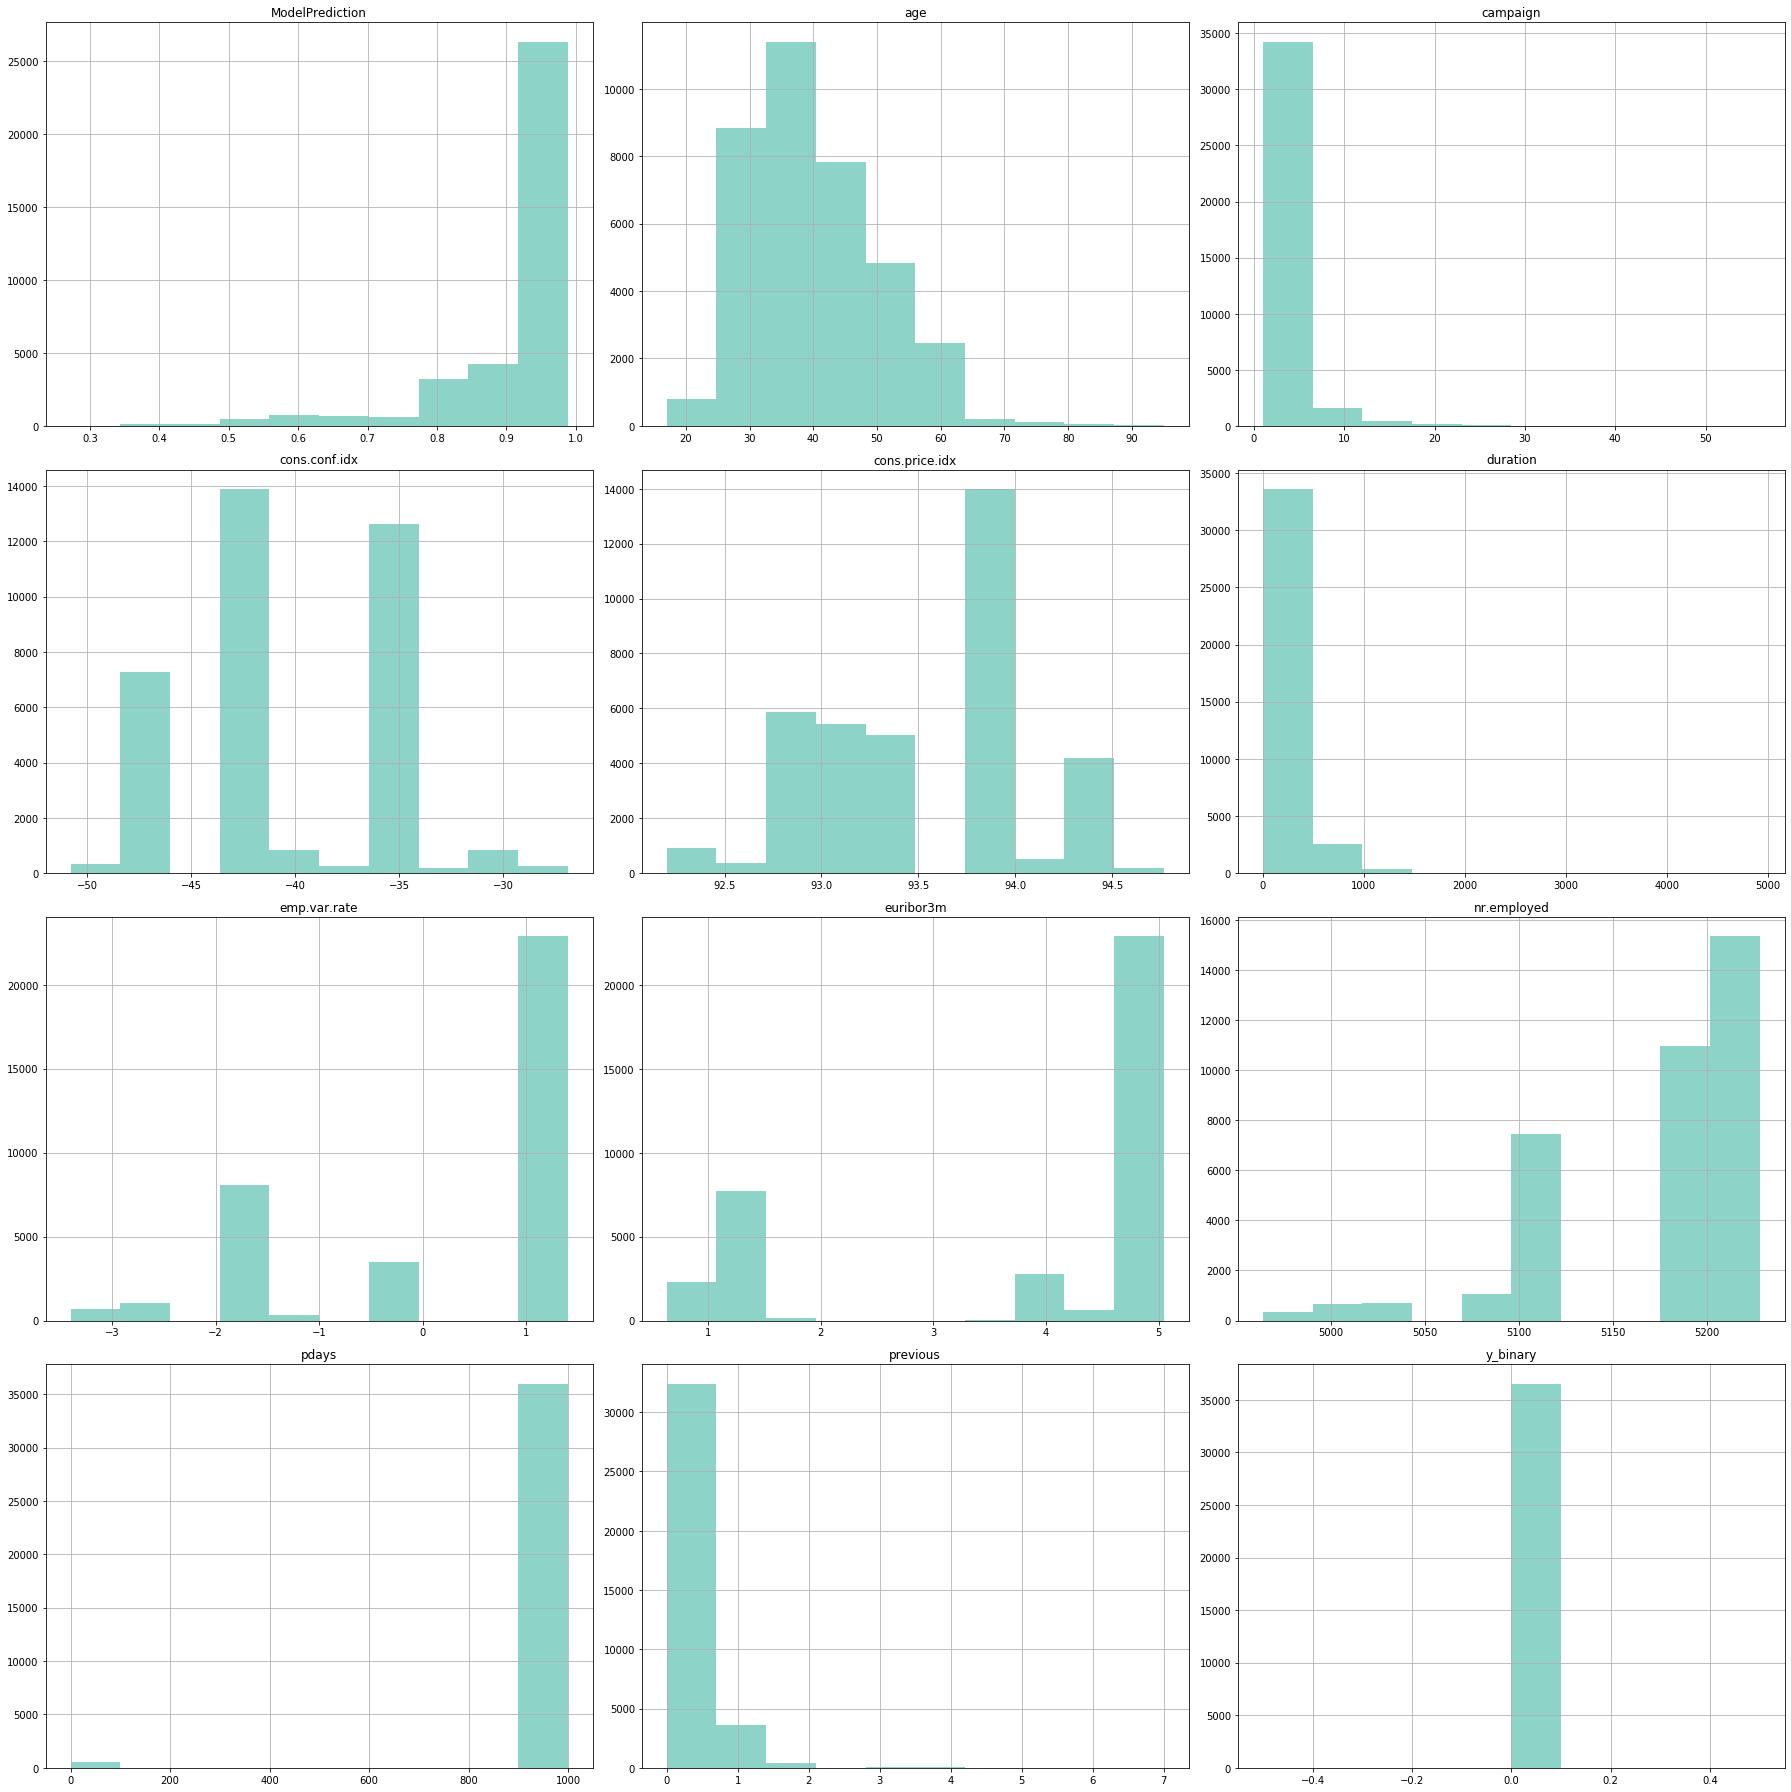

In [10]:
original[original['y_binary']==0].hist(figsize=(25,25)) 
plt.tight_layout()
plt.show()

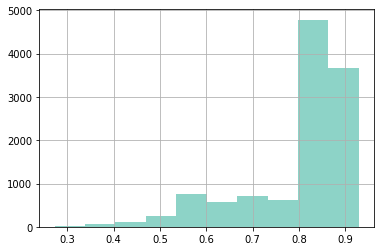

In [11]:
original.loc[(original['y_binary']==0) & (original['ModelPrediction'] < 0.93)].ModelPrediction.hist()

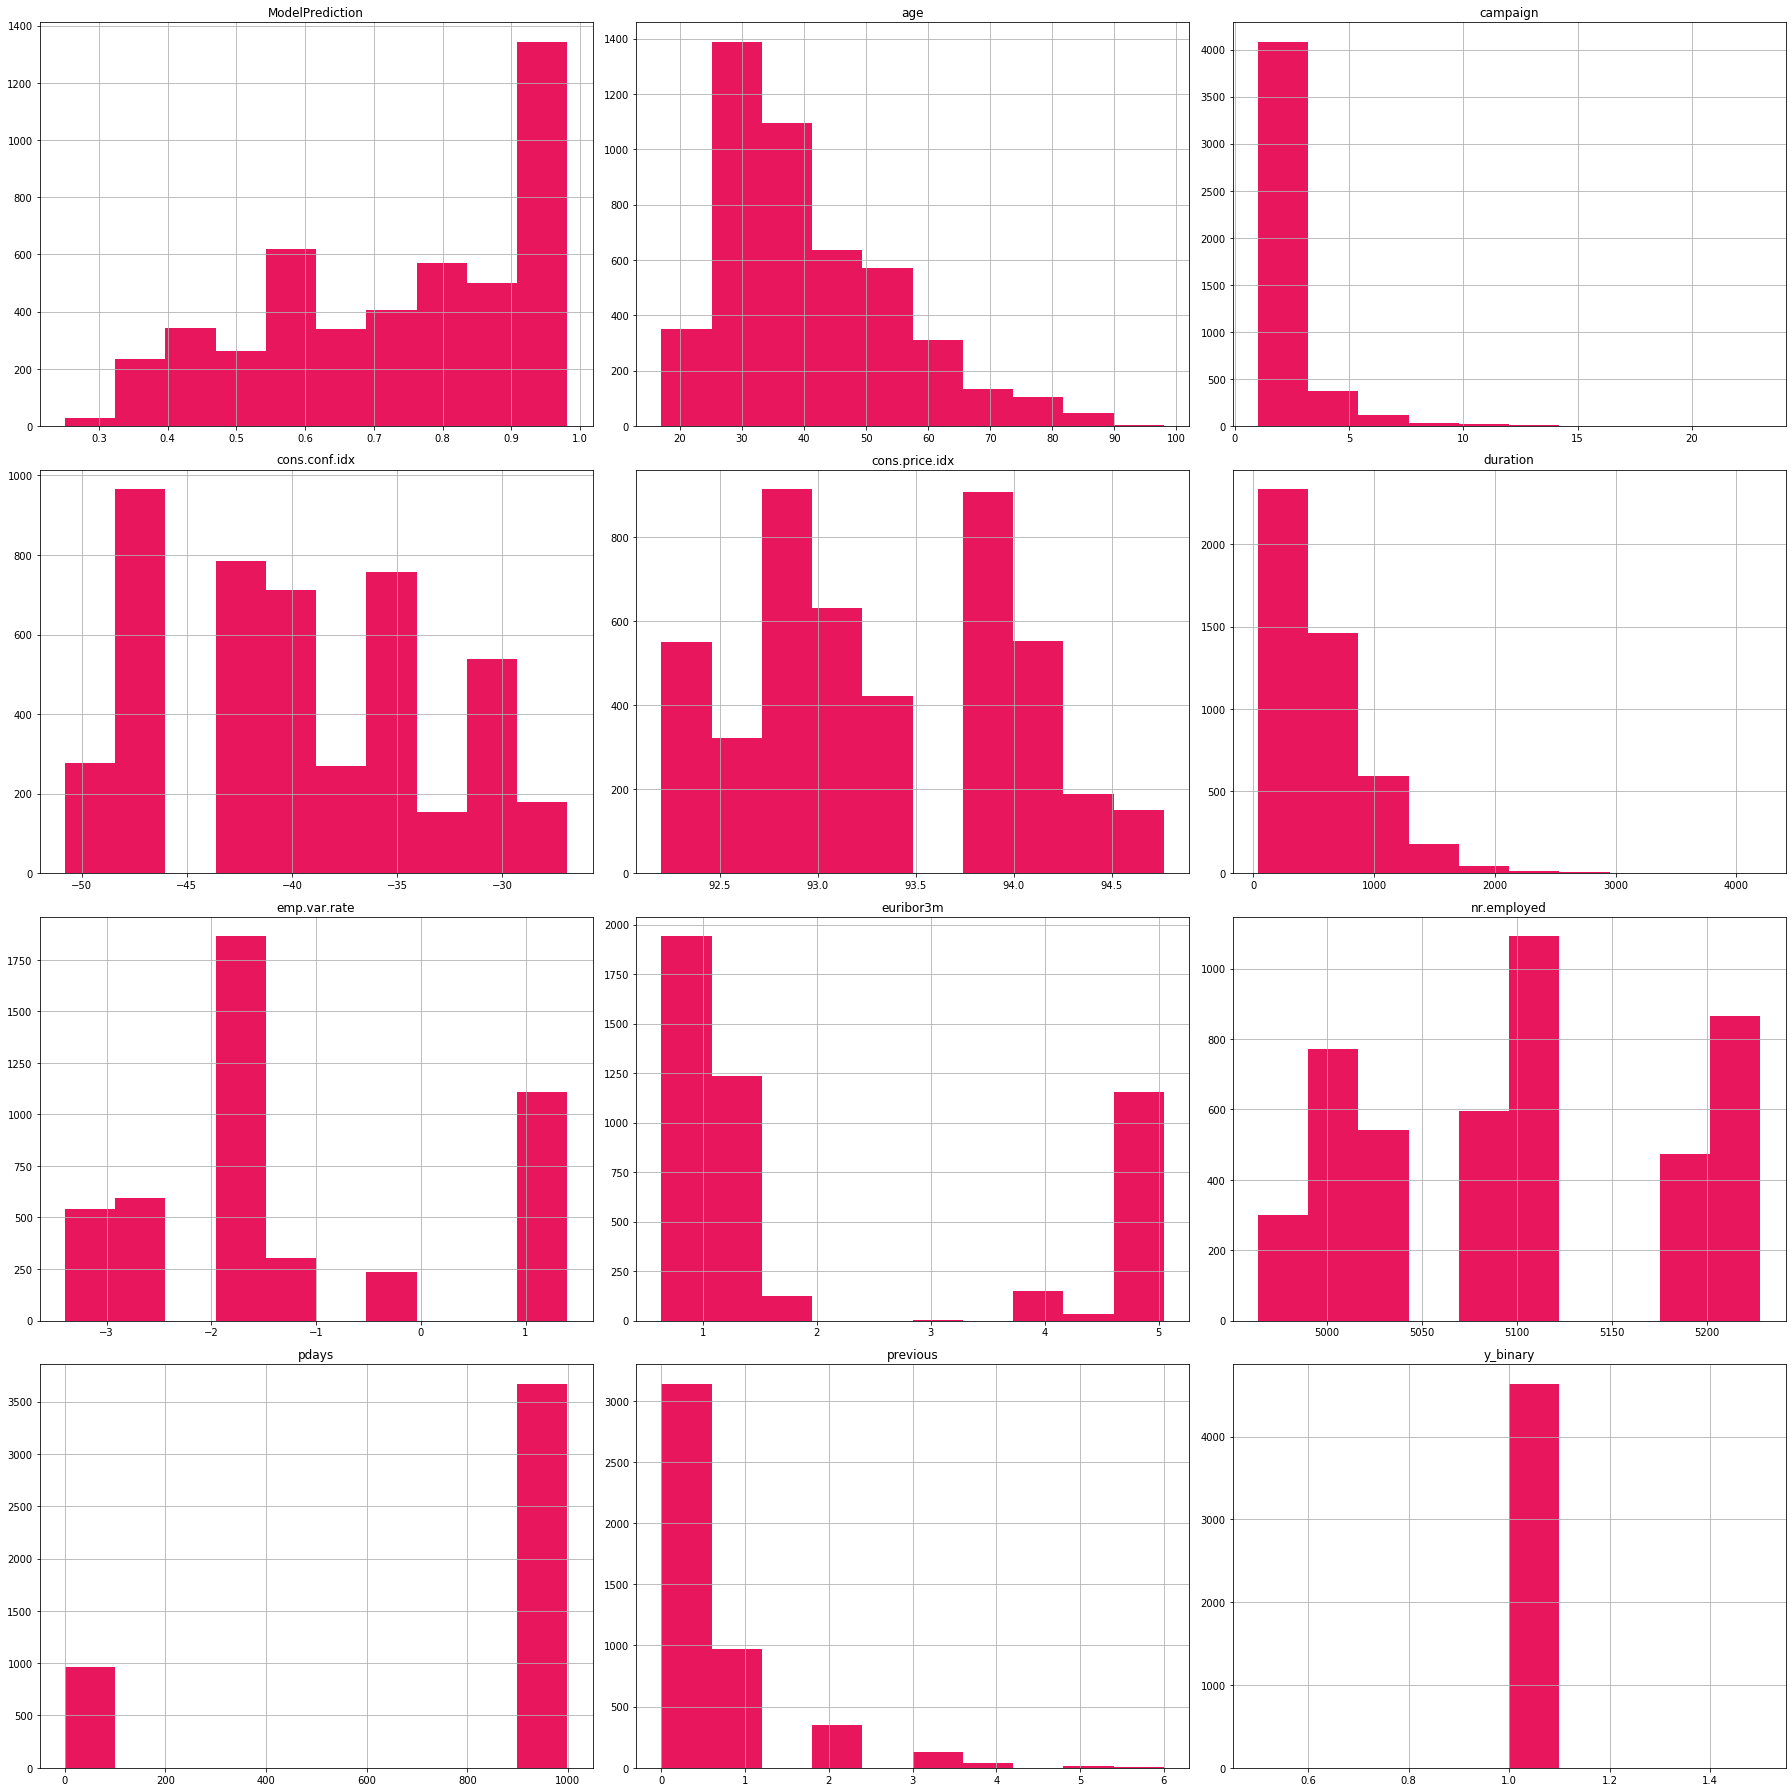

In [14]:
original[original['y_binary']==1].hist(figsize=(25,25), color='#E8175D') 
plt.tight_layout()
plt.show()

# BASIC EDA

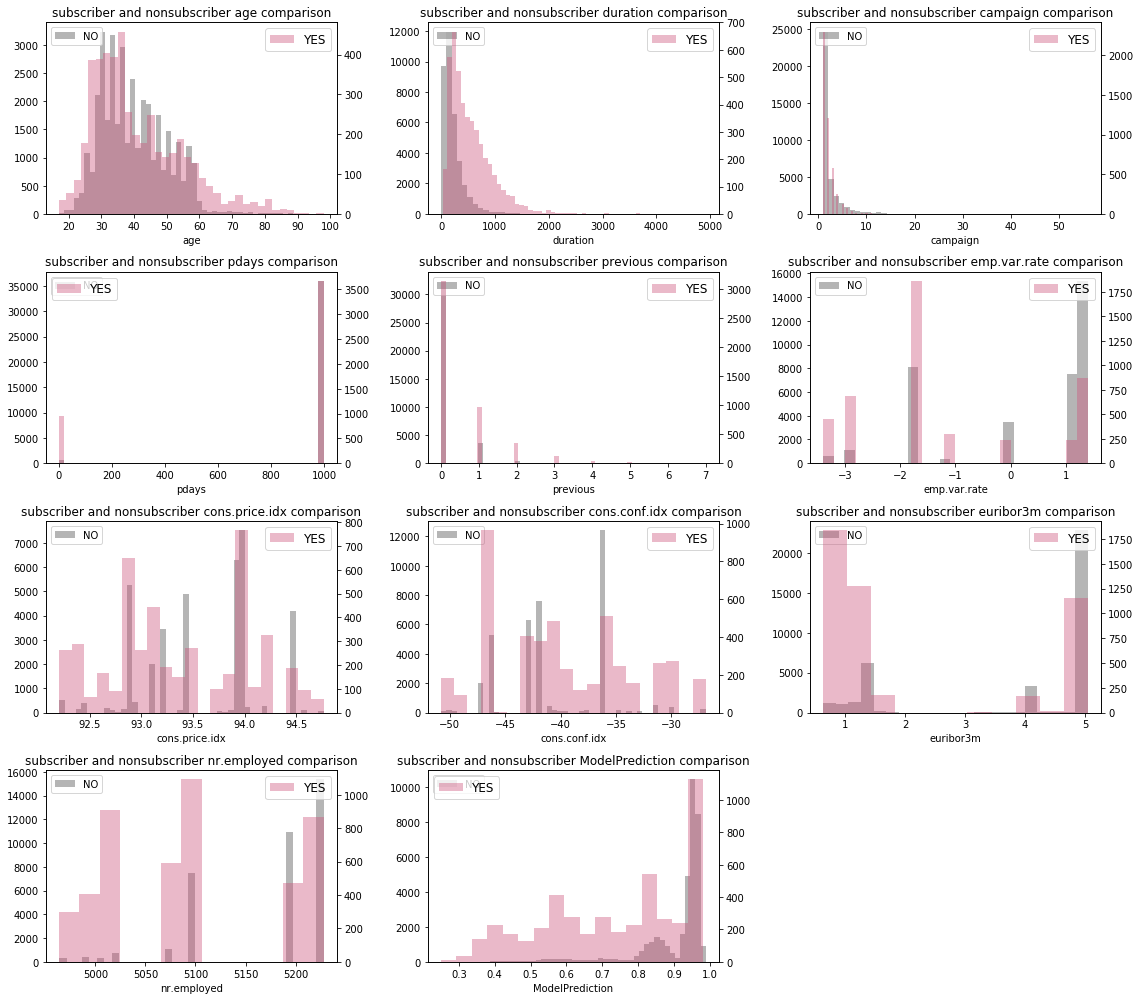

In [44]:
num_columns = ['age', 'duration', 'campaign','pdays', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','ModelPrediction']
n=1
plt.figure(figsize=[16,14])
for c in num_columns: 
    plt.subplot(4,3,n)
    ax = sns.distplot(original[c][original['y_binary'] == 0],  color='#474747', kde=False, label='NO')
    #ax.set_ylabel('no count')
    plt.legend(loc='upper left')
    ax2 = plt.twinx()
    ax2 = sns.distplot(original[c][original['y_binary'] == 1],  color='#CC527A', kde=False, label='YES',ax=ax2)
    #ax2.set_ylabel('yes count')
    plt.legend(loc='upper right')

    # Plot formatting
    plt.legend(prop={'size': 12})
    plt.title('subscriber and nonsubscriber ' + c +' comparison')
    
    n=n+1
plt.tight_layout()
plt.show()
plt.savefig('Num_hist')

Text(0.5, 1.0, 'subscriber and nonsubscriberagecomparison')

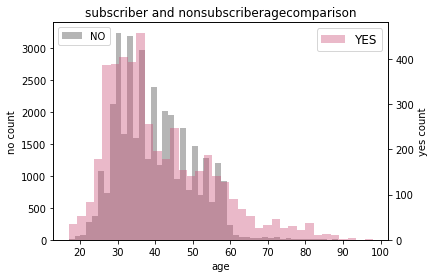

In [37]:
ax = sns.distplot(original['age'][original['y_binary'] == 0],  color='#474747', kde=False, label='NO')
ax.set_ylabel('no count')
plt.legend(loc='upper left')

ax2 = plt.twinx()
ax2 = sns.distplot(original['age'][original['y_binary'] == 1],  color='#CC527A', kde=False, label='YES',ax=ax2)
ax2.set_ylabel('yes count')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('subscriber and nonsubscriber ' + column +' comparison')

In [130]:
# multicolliniearity

In [15]:
econimic = original[['emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed','y']]

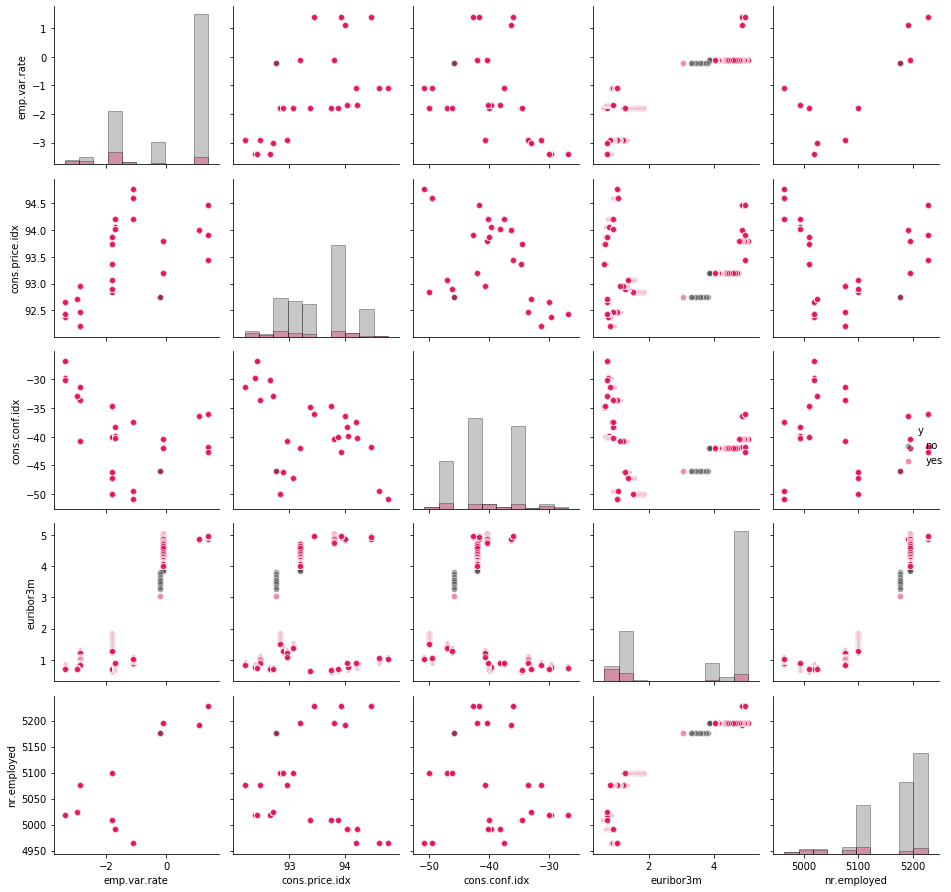

In [16]:
sns.pairplot(econimic, diag_kind='hist',  hue= 'y', 
             diag_kws={"edgecolor":"k", "alpha":0.3}, palette = {'yes': '#E8175D', 'no':'#474747'},
             plot_kws={"alpha":0.5})
plt.tight_layout()
plt.savefig('econ_index')

In [45]:
adopters = original.y_binary.value_counts().to_frame().reset_index()
adopters.columns = ['Purchase(0:no, 1:yes)', 'count']
adopters.head()

,"Purchase(0:no, 1:yes)",count
0,0,36548
1,1,4640


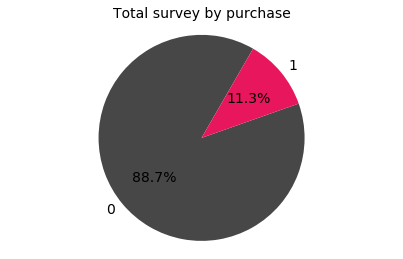

In [74]:
plt.pie(adopters['count'], labels=adopters['Purchase(0:no, 1:yes)'], autopct='%1.1f%%', startangle=60, colors=['#474747', '#E8175D'], textprops={'fontsize': 14})
plt.title('Total survey by purchase', fontsize=14)
plt.axis('equal')
plt.rcParams['font.size'] = 20

# Display plot
plt.tight_layout()
plt.show()
plt.savefig('subscriptionratio')


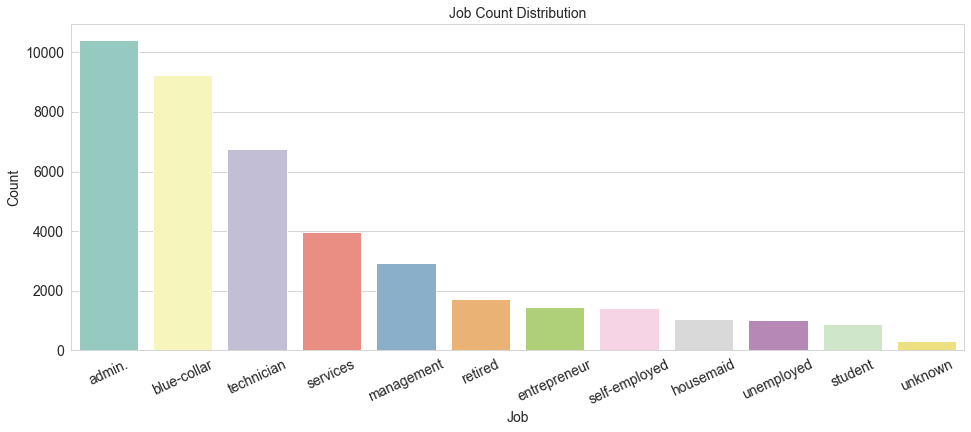

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)
sns.countplot(x = "job", data = original, order = original['job'].value_counts().index)
ax.set_xlabel('Job', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title("Job Count Distribution", fontsize = 14)
plt.xticks(fontsize=14, rotation=25)
plt.yticks(fontsize=14)
plt.savefig('totaljobcount')

In [49]:
job_by_result = original[['job','y']].groupby(['y', 'job']).size().to_frame().reset_index()
job_by_result.columns = ['result','job','count']

job_pivot = pd.pivot_table(job_by_result, values='count', index=['result'], columns=['job'])

In [50]:
job_pivot = job_pivot.append(job_pivot.sum().rename('Total'))
job_pivot['Total'] = job_pivot.sum(axis=1)
job_pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,Total
result,,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293,36548
yes,1352,638,124,106,328,434,149,323,275,730,144,37,4640
Total,10422,9254,1456,1060,2924,1720,1421,3969,875,6743,1014,330,41188


In [51]:
# Job_pivot convered to %
barchart = job_pivot.div(job_pivot['Total'], axis = 0).round(4)*100
barchart = barchart.drop('Total').drop("Total", axis=1)
barchart

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
result,,,,,,,,,,,,
no,24.82,23.57,3.64,2.61,7.10,3.52,3.48,9.98,1.64,16.45,2.38,0.8
yes,29.14,13.75,2.67,2.28,7.07,9.35,3.21,6.96,5.93,15.73,3.10,0.8


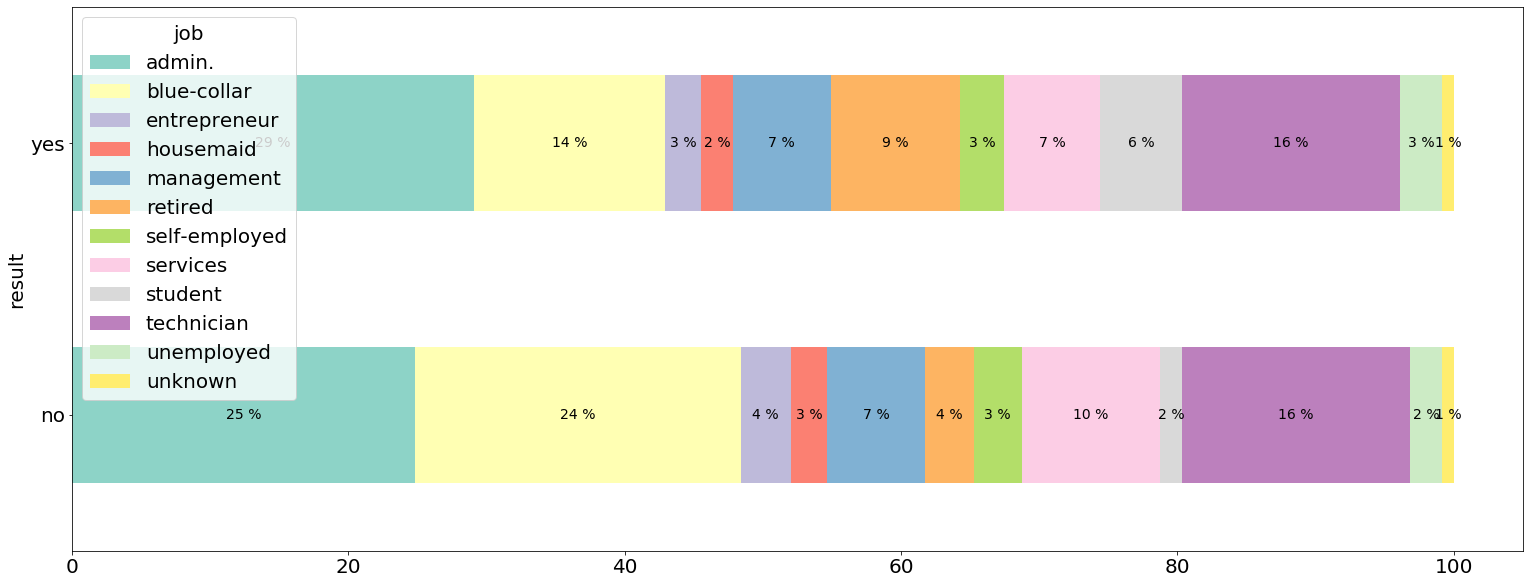

In [52]:
ax = barchart.plot(kind='barh', stacked=True, figsize=(26,10))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize=14)
    
plt.savefig('jobbreakdown')

In [66]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week']

In [79]:
marital_by_result = original[['marital','y']].groupby(['y', 'marital']).size().to_frame().reset_index()
marital_by_result.columns = ['result','marital','count']

marital_pivot = pd.pivot_table(marital_by_result, values='count', index=['result'], columns=['marital'])

In [80]:
marital_pivot = marital_pivot.append(marital_pivot.sum().rename('Total'))
marital_pivot['Total'] = marital_pivot.sum(axis=1)
marital_pivot

marital,divorced,married,single,unknown,Total
result,,,,,
no,4136,22396,9948,68,36548
yes,476,2532,1620,12,4640
Total,4612,24928,11568,80,41188


In [81]:
# marital_pivot convered to %
barchart2 = marital_pivot.div(marital_pivot['Total'], axis = 0).round(4)*100
barchart2 = barchart2.drop('Total').drop("Total", axis=1)
barchart2

marital,divorced,married,single,unknown
result,,,,
no,11.32,61.28,27.22,0.19
yes,10.26,54.57,34.91,0.26


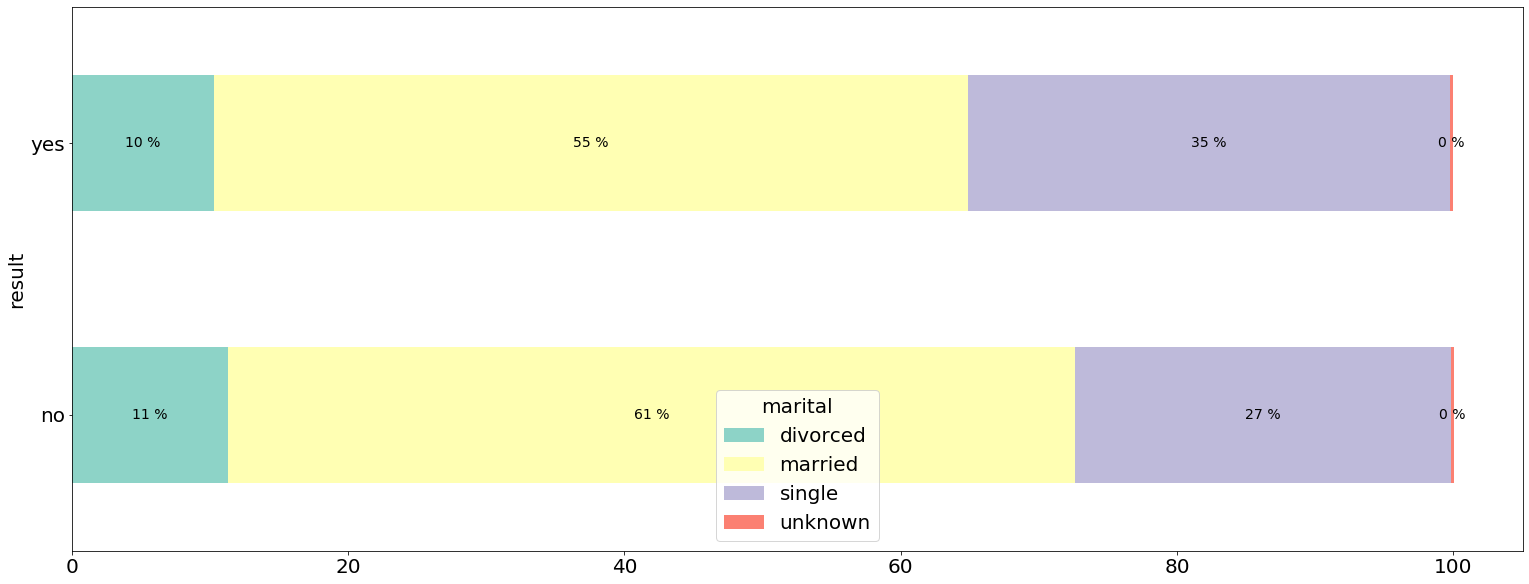

In [82]:
ax = barchart2.plot(kind='barh', stacked=True, figsize=(26,10))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize=14)
    
plt.savefig('maritalbreakdown')

In [85]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week']

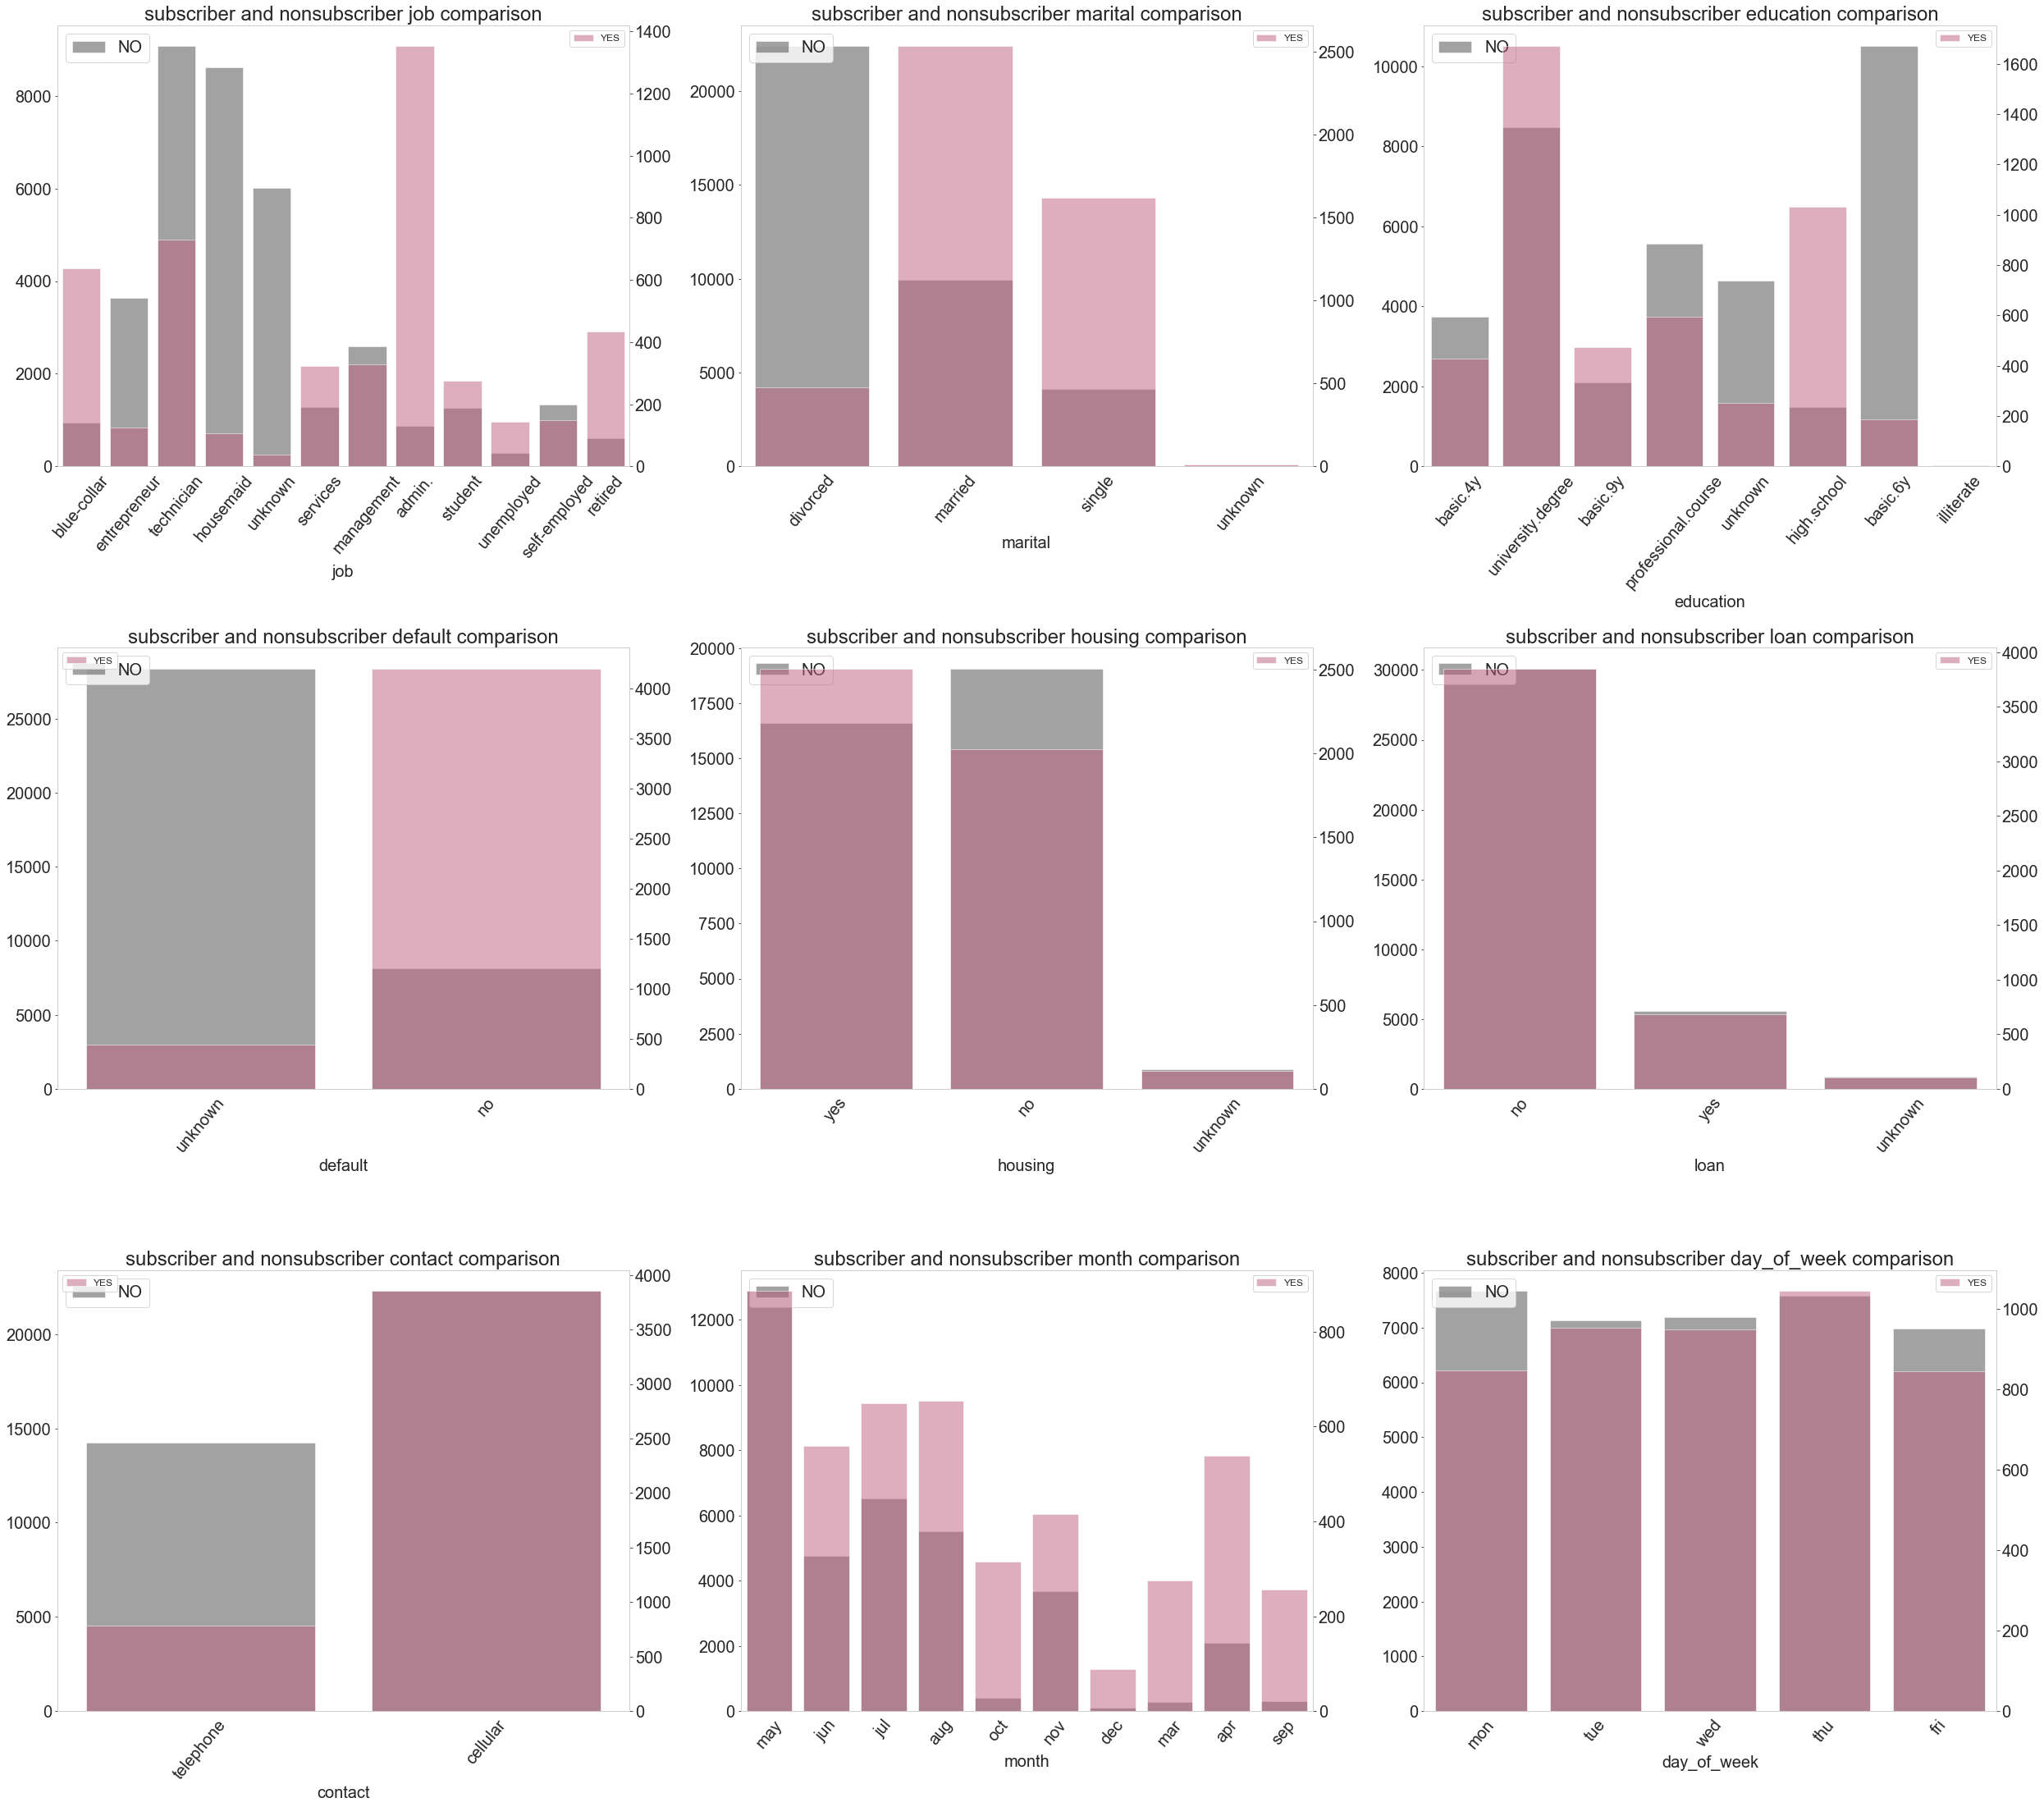

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize=[35,40])
n=1
for c in categorical: 
    
    plt.subplot(4,3,n)
    ax = sns.countplot(original[c][original['y_binary'] == 0],  color='#474747', alpha=0.5, label='NO')
    #ax.set_ylabel('no count')
    plt.legend(loc='upper left')
    plt.xticks(rotation = 50)
    plt.ylabel("")
    plt.grid(False)

    
    ax2 = plt.twinx()
    ax2 = sns.countplot(original[c][original['y_binary'] == 1],  color='#CC527A', alpha=0.5, label='YES',ax=ax2)
    #ax2.set_ylabel('yes count')
    plt.legend(loc='upper right')
    plt.ylabel("")
    plt.grid(False)

    # Plot formatting
    plt.legend(prop={'size': 12})
    plt.title('subscriber and nonsubscriber ' + c +' comparison')
    
    n=n+1
plt.tight_layout()
plt.show()
plt.savefig('cat_dist')

In [117]:
edu_by_result = original[['education','y']].groupby(['y', 'education']).size().to_frame().reset_index()
edu_by_result.columns = ['result','education','count']

edu_pivot = pd.pivot_table(edu_by_result, values='count', index=['result'], columns=['education'])

In [118]:
edu_pivot = edu_pivot.append(edu_pivot.sum().rename('Total'))
edu_pivot['Total'] = edu_pivot.sum(axis=1)
edu_pivot

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,Total
result,,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480,36548
yes,428,188,473,1031,4,595,1670,251,4640
Total,4176,2292,6045,9515,18,5243,12168,1731,41188


In [119]:
# edu_pivot convered to %
barchart3 = edu_pivot.div(edu_pivot['Total'], axis = 0).round(4)*100
barchart3 = barchart3.drop('Total').drop("Total", axis=1)
barchart3

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
result,,,,,,,,
no,10.26,5.76,15.25,23.21,0.04,12.72,28.72,4.05
yes,9.22,4.05,10.19,22.22,0.09,12.82,35.99,5.41


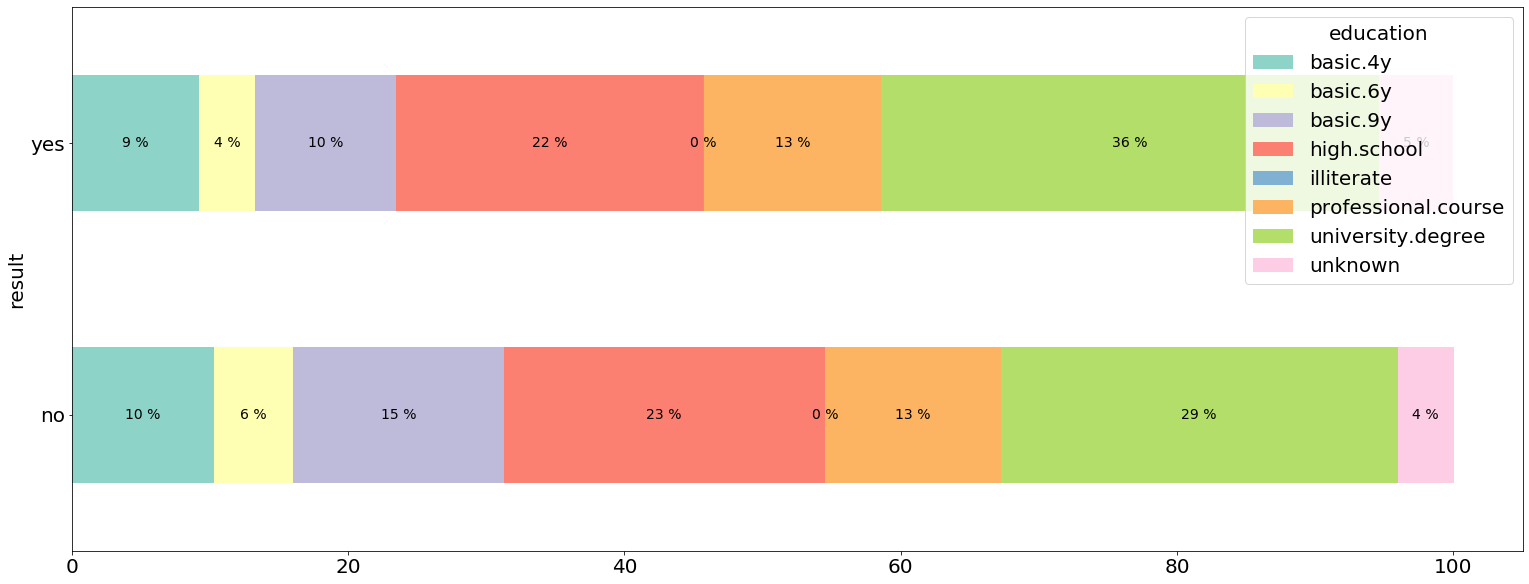

In [120]:
ax = barchart3.plot(kind='barh', stacked=True, figsize=(26,10))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize=14)
    
plt.savefig('edu_breakdown')

In [121]:
loan_by_result = original[['loan','y']].groupby(['y', 'loan']).size().to_frame().reset_index()
loan_by_result.columns = ['result','loan','count']

loan_pivot = pd.pivot_table(loan_by_result, values='count', index=['result'], columns=['loan'])

In [122]:
loan_pivot = loan_pivot.append(loan_pivot.sum().rename('Total'))
loan_pivot['Total'] = loan_pivot.sum(axis=1)
loan_pivot

loan,no,unknown,yes,Total
result,,,,
no,30100,883,5565,36548
yes,3850,107,683,4640
Total,33950,990,6248,41188


In [123]:
# edu_pivot convered to %
loan = loan_pivot.div(loan_pivot['Total'], axis = 0).round(4)*100
loan = loan.drop('Total').drop("Total", axis=1)
loan

loan,no,unknown,yes
result,,,
no,82.36,2.42,15.23
yes,82.97,2.31,14.72


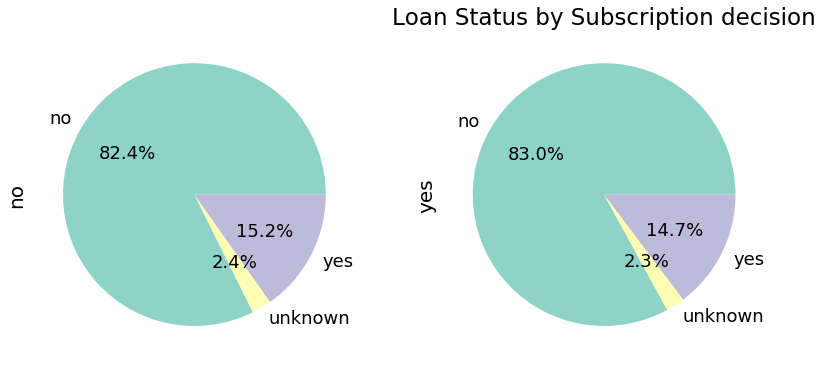

In [128]:
#plt.figure(figsize=(32,8))
loan.T.plot(subplots=True, kind='pie', autopct='%1.1f%%', figsize=(12,6), legend=False, textprops={'fontsize': 18})
plt.title("Loan Status by Subscription decision", fontsize=23, )
plt.tight_layout()
plt.show()
plt.savefig('loanstatus')

Loan status might be potentially non-relevant feature in modeling

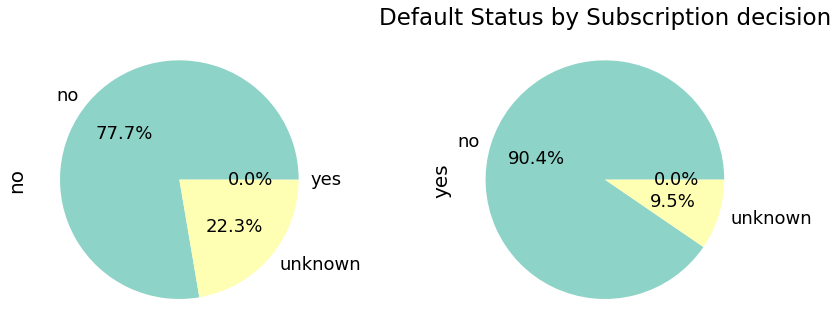

In [129]:
default_by_result = original[['default','y']].groupby(['y', 'default']).size().to_frame().reset_index()
default_by_result.columns = ['result','default','count']

default_pivot = pd.pivot_table(default_by_result, values='count', index=['result'], columns=['default'])
default_pivot = default_pivot.append(default_pivot.sum().rename('Total'))
default_pivot['Total'] = default_pivot.sum(axis=1)
default_pivot
# default_pivot convered to %
default = default_pivot.div(default_pivot['Total'], axis = 0).round(4)*100
default = default.drop('Total').drop("Total", axis=1)


default.T.plot(subplots=True, kind='pie', autopct='%1.1f%%', figsize=(12,6), legend=False, textprops={'fontsize': 18})
plt.title("Default Status by Subscription decision", fontsize=23, )
plt.tight_layout()
plt.show()
plt.savefig('defaultstatus')


Maybe can make this variable binary -code unknown + defaulted as 1 and not-defaulted as 0

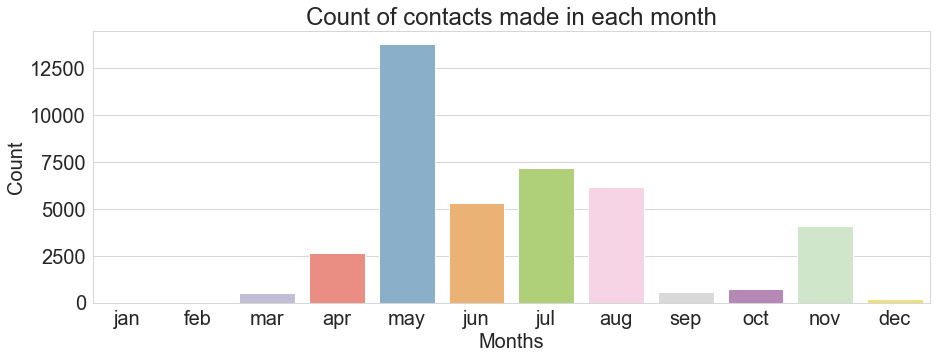

In [187]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = original, order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")
plt.savefig('monthtotalcalls')

In [177]:
month_by_result = original[['month','y']].groupby(['y', 'month']).size().to_frame().reset_index()
month_by_result.columns = ['result','month','count']

month_pivot = pd.pivot_table(month_by_result, values='count', index=['result'], columns=['month'])

month_pivot = month_pivot.append(month_pivot.sum().rename('Total'))
month_pivot['Total'] = month_pivot.sum(axis=1)
month_pivot




month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,Total
result,,,,,,,,,,,
no,2093,5523,93,6525,4759,270,12883,3685,403,314,36548
yes,539,655,89,649,559,276,886,416,315,256,4640
Total,2632,6178,182,7174,5318,546,13769,4101,718,570,41188


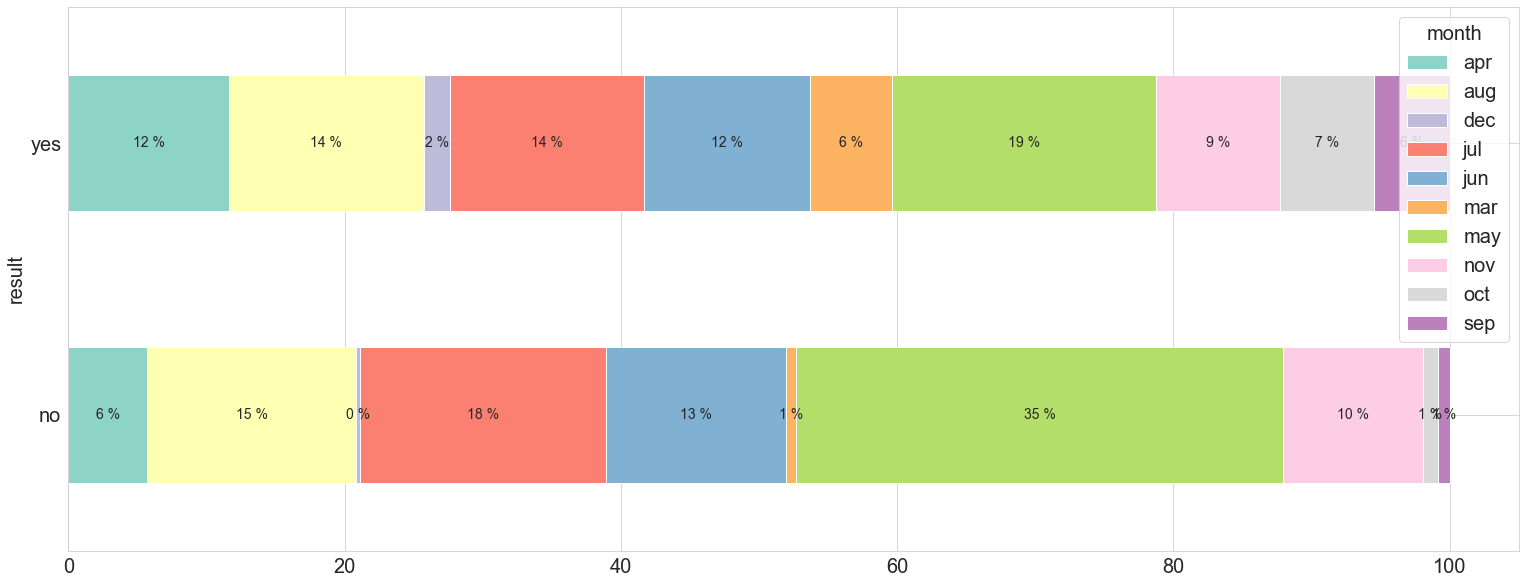

In [179]:
# month_pivot convered to %
barchart4 = month_pivot.div(month_pivot['Total'], axis = 0).round(4)*100
barchart4 = barchart4.drop('Total').drop("Total", axis=1)

ax = barchart4.plot(kind='barh', stacked=True, figsize=(26,10))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', fontsize=14)
    
plt.savefig('month_breakdown')

# Correlation with subscription decision

In [64]:
cor=original.corr()
cor_sorted=cor.sort_values(by='y_binary', ascending=False)
cor_sorted['y_binary']

y_binary           1.000000
duration           0.405274
previous           0.230181
cons.conf.idx      0.054878
age                0.030399
campaign          -0.066357
cons.price.idx    -0.136211
emp.var.rate      -0.298334
euribor3m         -0.307771
pdays             -0.324914
nr.employed       -0.354678
ModelPrediction   -0.430859
Name: y_binary, dtype: float64

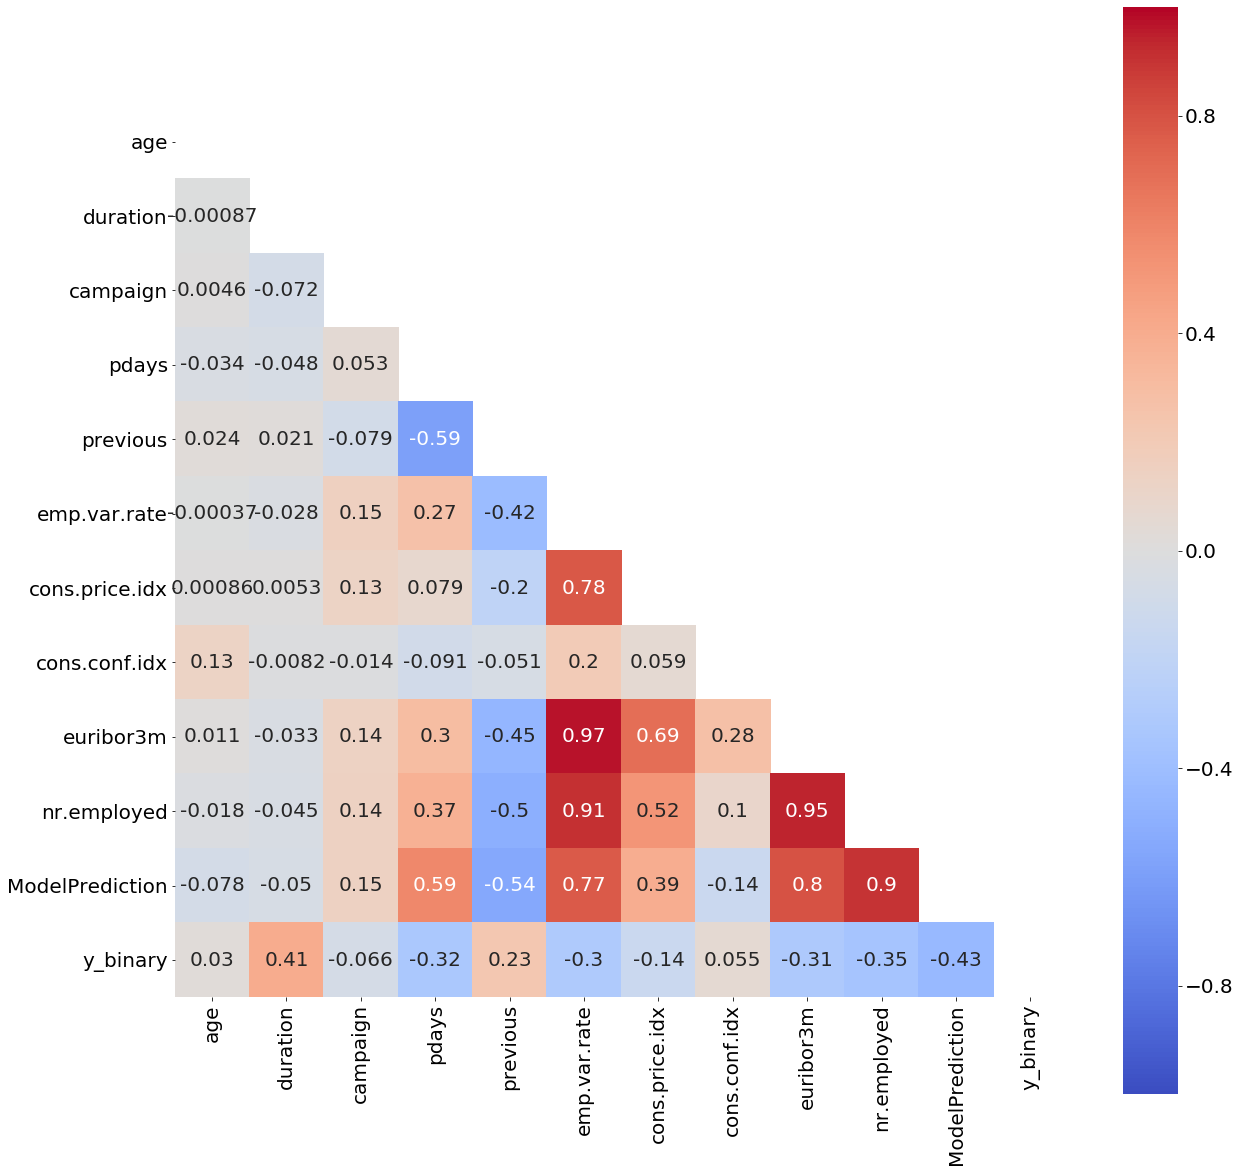

In [65]:
plt.figure(figsize=(20,20))
matrix = np.triu(cor)
sns.heatmap(cor, annot=True, square=True, vmin=-1, vmax=1,  cmap='coolwarm', center=0, mask = matrix)
plt.savefig('num_corr')

Duration shows highest positive correlation with subscriptiond decision. This makes sense as interested customers will stay in the call longer to learn about the product and go through subscription process.
However, duration can be known only after a contact made. it has to be excluded in the modeling.

In [67]:
all_category = []            
for c in categorical:                       
    df = pd.get_dummies(original[c], prefix=c)           
    all_category.append(df)
categorical = pd.concat(all_category, axis=1)

In [68]:
categorical['y_binary'] = original['y_binary']
categorical.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y_binary
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [69]:
cor_cat=categorical.corr()
cor_cat_sorted=cor_cat.sort_values(by='y_binary', ascending=False)
cor_cat_sorted['y_binary']

y_binary                         1.000000
contact_cellular                 0.144773
month_mar                        0.144014
month_oct                        0.137366
month_sep                        0.126067
default_no                       0.099344
job_student                      0.093955
job_retired                      0.092221
month_dec                        0.079303
month_apr                        0.076136
marital_single                   0.054133
education_university.degree      0.050364
job_admin.                       0.031426
education_unknown                0.021430
job_unemployed                   0.014752
day_of_week_thu                  0.013888
housing_yes                      0.011743
day_of_week_tue                  0.008046
education_illiterate             0.007246
day_of_week_wed                  0.006302
marital_unknown                  0.005211
loan_no                          0.005123
education_professional.course    0.001003
job_unknown                     -0

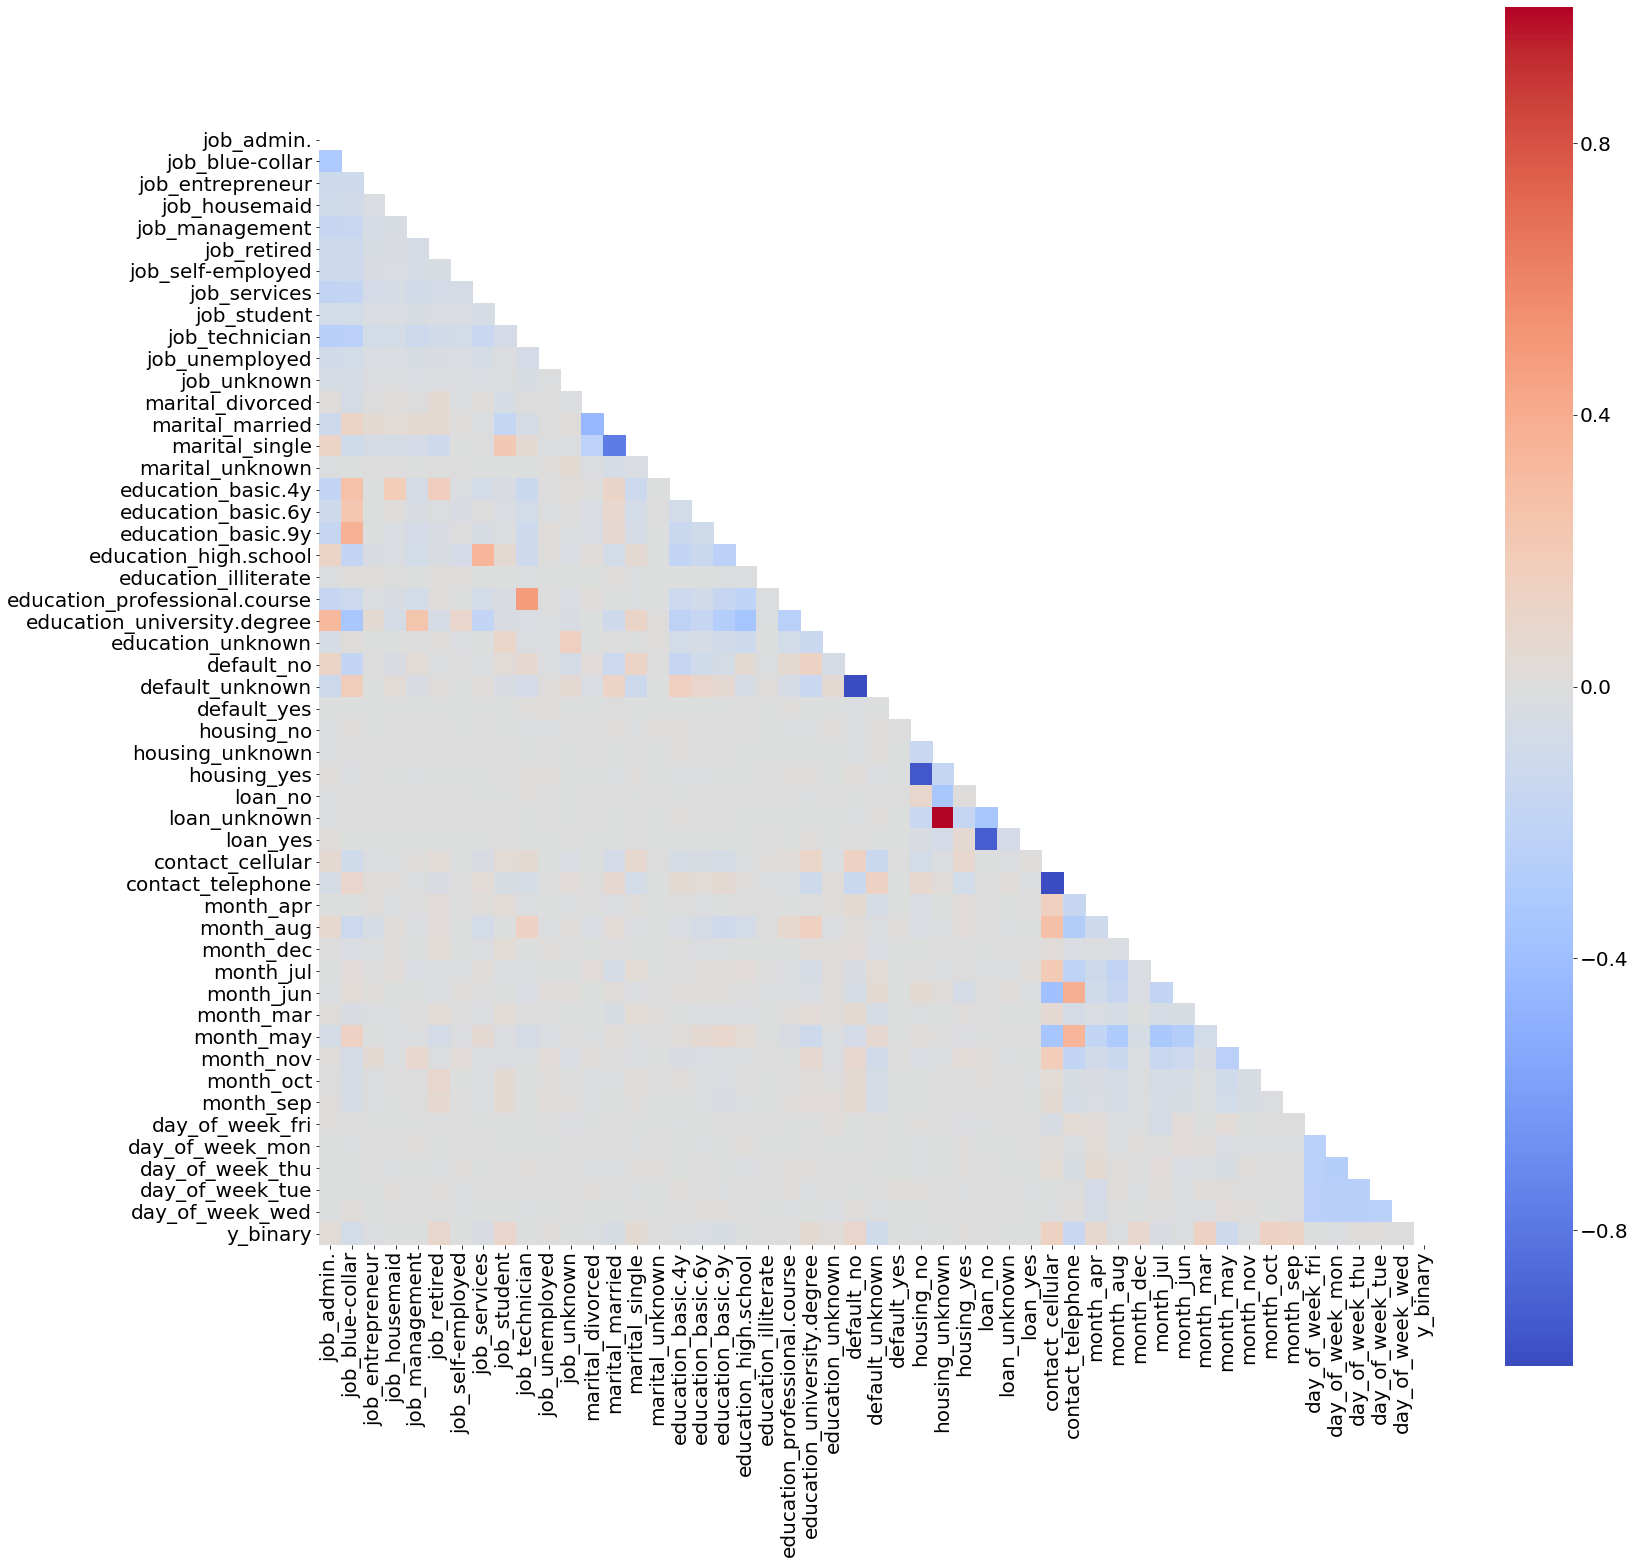

In [70]:
plt.figure(figsize=(25,25))
matrix = np.triu(cor_cat)
sns.heatmap(cor_cat, square=True, vmin=-1, vmax=1,  cmap='coolwarm', center=0, mask = matrix)
plt.savefig('cat_corr')

# Performance Metrics - current model : unclassified (probability dist.)

In [132]:
#print('Report:\n',classification_report(original.y_binary, original.ModelPrediction))
#print("F1 Score:",f1_score(original.y_binary, original.ModelPrediction))
#print('F2 score:',fbeta_score(original.y_binary, original.ModelPrediction, beta=2.0))
print('AUC score:',roc_auc_score(original.y_binary, original.ModelPrediction))
#print('confusion Matrix:\n',confusion_matrix(original.y_binary, original.ModelPrediction))
#print("Acurracy :::>",accuracy_score(original.y_binary, original.ModelPrediction))

AUC score: 0.23531485696184137


## Model Prediction probablility Distribution

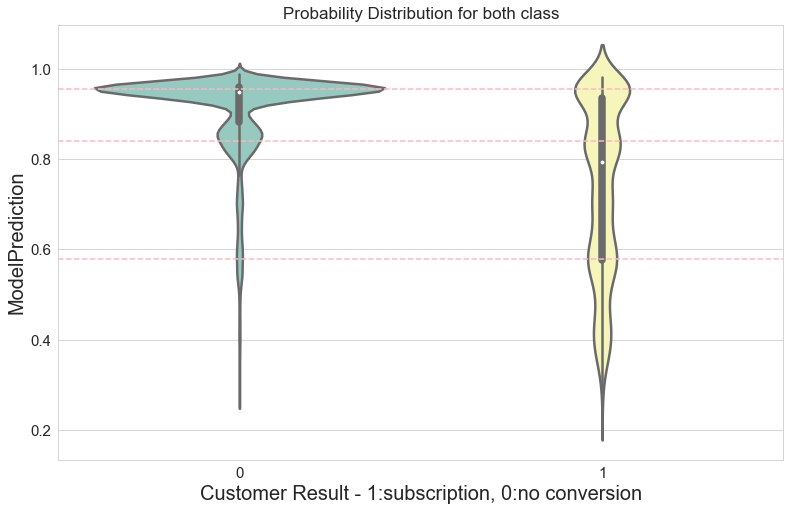

In [134]:
plt.figure(figsize=(13,8))
sns.set_style("whitegrid")
sns.violinplot(x='y_binary', y='ModelPrediction', data=original, inner="box", linewidth=2.5)
plt.axhline(0.955, linestyle = '--', color = 'lightpink')
plt.axhline(0.84, linestyle = '--', color = 'lightpink')
plt.axhline(0.58, linestyle = '--', color = 'lightpink')
plt.title("Probability Distribution for both class", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## ROC Curve

In [135]:
performance = original[['ModelPrediction', 'y_binary']]

In [136]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(performance.y_binary, performance.ModelPrediction)

In [137]:
# calculate AUC
auc = roc_auc_score(performance.y_binary, performance.ModelPrediction)
print('AUC: %.3f' % auc)

AUC: 0.235


NO SKILL Base line

In [138]:
ns_probs = [0 for _ in range(len(performance.y_binary))]
ns_auc = roc_auc_score(performance.y_binary, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(performance.y_binary, ns_probs)

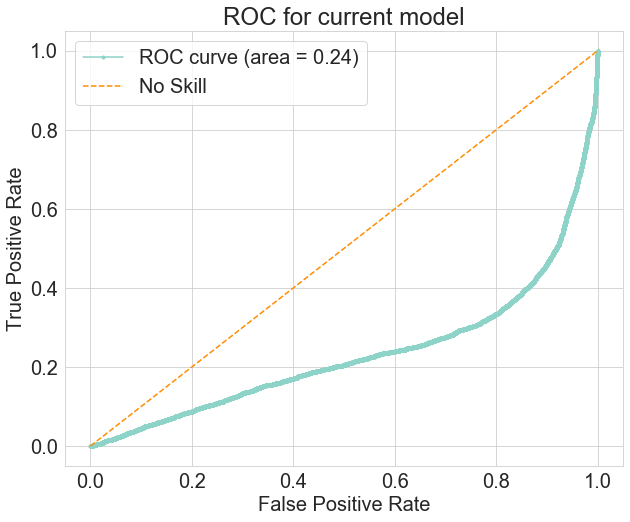

In [140]:
# plot the roc curve for the model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'darkorange', label='No Skill')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC for current model')
# show the plot
plt.show()

## PR-AUC

### calculate precision-recall curve

In [141]:
precision, recall, _ = precision_recall_curve(performance.y_binary, performance.ModelPrediction)
no_skill = len(performance.y_binary[performance.y_binary==1]) / len(performance.y_binary)

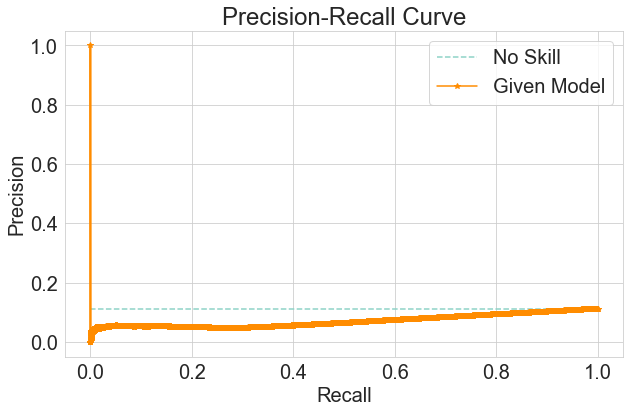

In [142]:
plt.figure(figsize=(10,6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(performance.y_binary, performance.ModelPrediction)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='*', label='Given Model', color = 'darkorange')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

The precision is the ratio tp / (tp + fp). The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn). The recall is intuitively the ability of the classifier to find all the positive samples.

In our case, losing a potential customer by not reaching out is a lot more costly than reaching out to a non-convertible candidate. so Recall is more important metric in this study.

# Confusion Matric / Classification

## Model Evaluation - Threshold 58%

Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels.

In [143]:
performance.tail()

,ModelPrediction,y_binary
41183,0.567417,1
41184,0.655416,0
41185,0.574102,0
41186,0.615098,1
41187,0.631597,0


In [145]:
performance['pred58'] = performance.apply(lambda row: 1 if (row.ModelPrediction > 0.58) else 0, axis=1)
performance.tail()

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ModelPrediction,y_binary,pred58
41183,0.567417,1,0
41184,0.655416,0,1
41185,0.574102,0,0
41186,0.615098,1,1
41187,0.631597,0,1


In [147]:
performance.pred58.value_counts(normalize = True)

1    0.948092
0    0.051908
Name: pred58, dtype: float64

In [148]:
performance['pred58_confusion'] = performance.apply(lambda row: 'FP' if (row.y_binary ==0) & (row.pred58==1) else 'TN' if (row.y_binary==0)&(row.pred58==0) else 'FN' if (row.y_binary==1)&(row.pred58==0) else 'TP', axis=1)
performance.head()

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ModelPrediction,y_binary,pred58,pred58_confusion
0,0.932750,0,1,FP
1,0.953579,0,1,FP
2,0.945724,0,1,FP
3,0.933875,0,1,FP
4,0.940996,0,1,FP


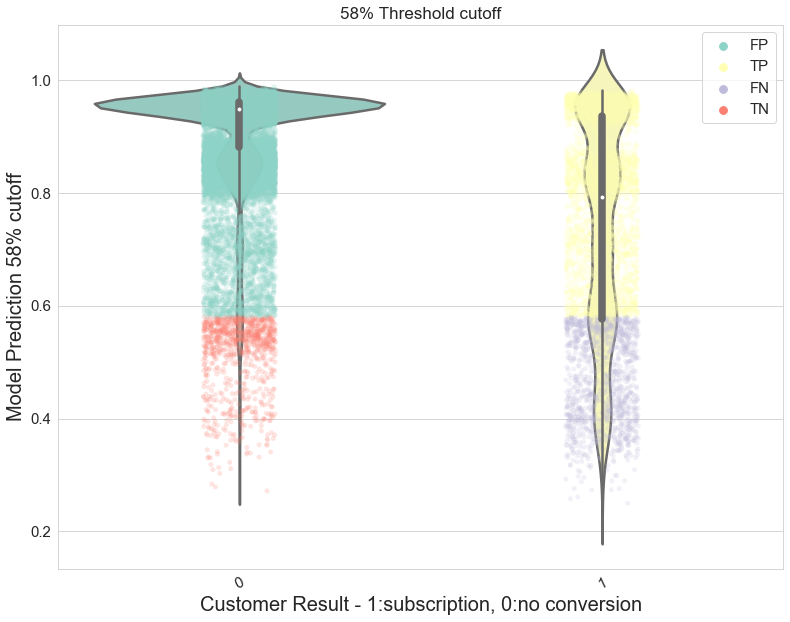

In [149]:
plt.figure(figsize=(13,10))
sns.set_style("whitegrid")
sns.violinplot(x='y_binary', y='ModelPrediction', data=performance, inner="box", linewidth=2.5)
sns.stripplot(x='y_binary', y='ModelPrediction', hue='pred58_confusion', data=performance, jitter=True, alpha= 0.2, zorder=1)

plt.title("58% Threshold cutoff", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.ylabel('Model Prediction 58% cutoff')
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, title_fontsize=15)
plt.show()

Usually when the class distribution is unbalanced, accuracy is considered a poor choice as it gives high scores to models which just predict the most frequent class.

Recall is also referred to as sensitivity or the true-positive rate. It is the fraction of correct predictions among the true successes. Recall is high if the number of false negatives is low. Thus, it is a useful measure when the penalty for committing the Type II error (false negative) is high. 

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.



In [159]:
print('Report:\n',classification_report(performance.y_binary, performance.pred58))
print("F1 Score:",f1_score(performance.y_binary, performance.pred58))
print('F2 score:',fbeta_score(performance.y_binary, performance.pred58, beta=2.0))
print('AUC score:',roc_auc_score(performance.y_binary, performance.pred58))
print("Acurracy score:",accuracy_score(performance.y_binary, performance.pred58))
print("Precision score:", precision_score(performance.y_binary, performance.pred58))
print("Recall score:",recall_score(performance.y_binary, performance.pred58))
print('confusion Matrix:\n',confusion_matrix(performance.y_binary, performance.pred58))

Report:
               precision    recall  f1-score   support

           0       0.44      0.03      0.05     36548
           1       0.09      0.74      0.16      4640

    accuracy                           0.11     41188
   macro avg       0.27      0.38      0.10     41188
weighted avg       0.40      0.11      0.06     41188

F1 Score: 0.15788509956511787
F2 score: 0.2993403922930047
AUC score: 0.3846150480426308
Acurracy score: 0.10673011556764106
Precision score: 0.08832266325224071
Recall score: 0.7433189655172414
confusion Matrix:
 [[  947 35601]
 [ 1191  3449]]


It shows much higher recall, however, the overall performance of the model (accuracy) has dropped to 11%. The model is just predicting almost every candidate(95%) as 'convert(1)'. Achieved higher recall but this model is not useful

### new metric: Fbeta Measures / F2-Measure

*Source: https://machinelearningmastery.com/fbeta-measure-for-machine-learning/* 


The F2-measure is an example of the Fbeta-measure with a beta value of 2.0.
It has the effect of lowering the importance of precision and increase the importance of recall.
If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives, then the F2-measure puts more attention on minimizing false negatives than minimizing false positives.
The F2-measure is calculated as follows:
F2-Measure = ((1 + 2^2) * Precision * Recall) / (2^2 * Precision + Recall)

[[ 3449  1191]
 [35601   947]]


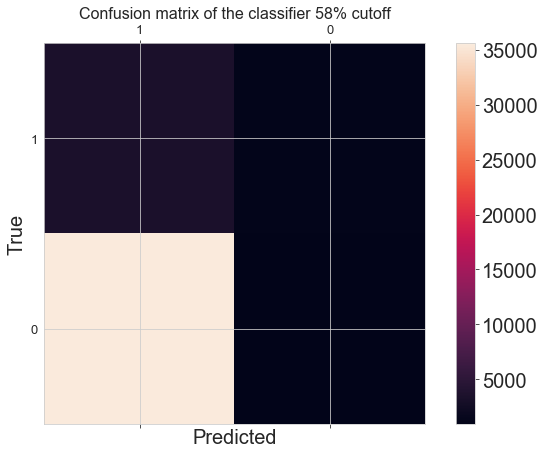

In [156]:
labels = [1,0]
cm = confusion_matrix(performance.y_binary, performance.pred58, labels)
print(cm)

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier 58% cutoff', fontsize=16)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=13)
ax.set_yticklabels([''] + labels, fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model Evaluation - Threshold 84%

In [160]:
performance['pred84'] = performance.apply(lambda row: 1 if (row.ModelPrediction > 0.84) else 0, axis=1)
performance.tail()

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ModelPrediction,y_binary,pred58,pred58_confusion,pred84
41183,0.567417,1,0,FN,0
41184,0.655416,0,1,FP,0
41185,0.574102,0,0,TN,0
41186,0.615098,1,1,TP,0
41187,0.631597,0,1,FP,0


In [161]:
performance.pred84.value_counts(normalize = True)

1    0.795329
0    0.204671
Name: pred84, dtype: float64

In [162]:
performance['pred84_confusion'] = performance.apply(lambda row: 'FP' if (row.y_binary ==0) & (row.pred84==1) else 'TN' if (row.y_binary==0)&(row.pred84==0) else 'FN' if (row.y_binary==1)&(row.pred84==0) else 'TP', axis=1)
performance.head()

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ModelPrediction,y_binary,pred58,pred58_confusion,pred84,pred84_confusion
0,0.932750,0,1,FP,1,FP
1,0.953579,0,1,FP,1,FP
2,0.945724,0,1,FP,1,FP
3,0.933875,0,1,FP,1,FP
4,0.940996,0,1,FP,1,FP


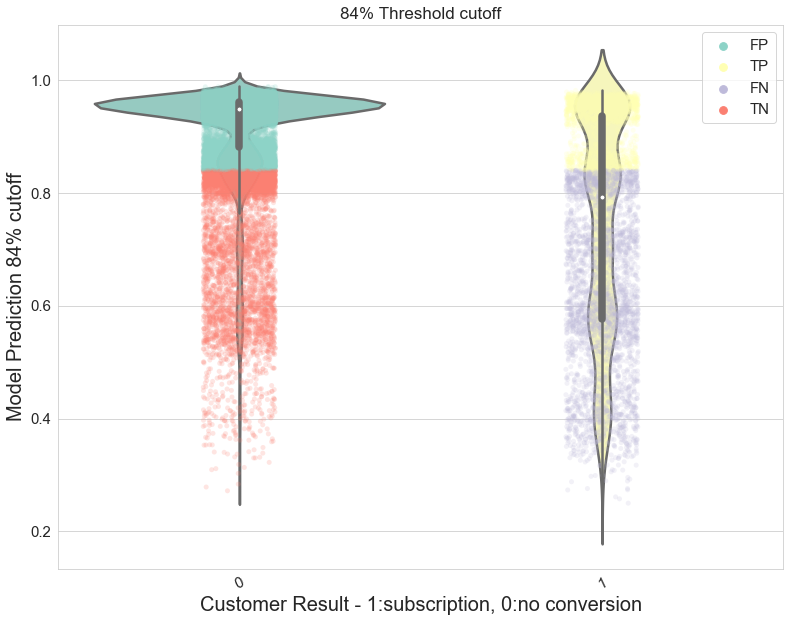

In [163]:
plt.figure(figsize=(13,10))
sns.set_style("whitegrid")
sns.violinplot(x='y_binary', y='ModelPrediction', data=performance, inner="box", linewidth=2.5)
sns.stripplot(x='y_binary', y='ModelPrediction', hue='pred84_confusion', data=performance, jitter=True, alpha= 0.2, zorder=1)

plt.title("84% Threshold cutoff", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.ylabel('Model Prediction 84% cutoff')
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, title_fontsize=15)
plt.show()

In [164]:
print('Report:\n',classification_report(performance.y_binary, performance.pred84))
print("F1 Score:",f1_score(performance.y_binary, performance.pred84))
print('F2 score:',fbeta_score(performance.y_binary, performance.pred84, beta=2.0))
print('AUC score:',roc_auc_score(performance.y_binary, performance.pred84))
print("Acurracy score:",accuracy_score(performance.y_binary, performance.pred84))
print("Precision score:", precision_score(performance.y_binary, performance.pred84))
print("Recall score:",recall_score(performance.y_binary, performance.pred84))
print('confusion Matrix:\n',confusion_matrix(performance.y_binary, performance.pred84))

Report:
               precision    recall  f1-score   support

           0       0.66      0.15      0.25     36548
           1       0.05      0.38      0.09      4640

    accuracy                           0.18     41188
   macro avg       0.36      0.27      0.17     41188
weighted avg       0.59      0.18      0.23     41188

F1 Score: 0.09487138349644367
F2 score: 0.17284383647063406
AUC score: 0.2672828693866922
Acurracy score: 0.17815868699621248
Precision score: 0.0541547102997741
Recall score: 0.38232758620689655
confusion Matrix:
 [[ 5564 30984]
 [ 2866  1774]]


None of the states shows acceptible performance

[[ 1774  2866]
 [30984  5564]]


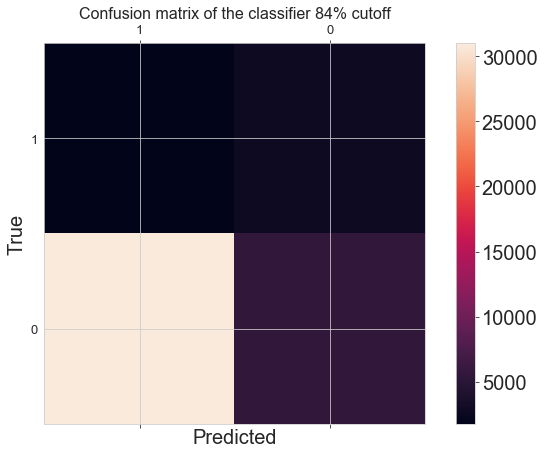

In [165]:
labels = [1,0]
cm = confusion_matrix(performance.y_binary, performance.pred84, labels)
print(cm)

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier 84% cutoff', fontsize=16)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=13)
ax.set_yticklabels([''] + labels, fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model Evaluation - Threshold 95%

In [167]:
performance['pred95'] = performance.apply(lambda row: 1 if (row.ModelPrediction > 0.95) else 0, axis=1)

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
performance.pred95.value_counts(normalize = True)

0    0.563222
1    0.436778
Name: pred95, dtype: float64

In [169]:
performance['pred95_confusion'] = performance.apply(lambda row: 'FP' if (row.y_binary ==0) & (row.pred95==1) else 'TN' if (row.y_binary==0)&(row.pred95==0) else 'FN' if (row.y_binary==1)&(row.pred95==0) else 'TP', axis=1)
performance.head()

/Users/minz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ModelPrediction,y_binary,pred58,pred58_confusion,pred84,pred84_confusion,pred95,pred95_confusion
0,0.932750,0,1,FP,1,FP,0,TN
1,0.953579,0,1,FP,1,FP,1,FP
2,0.945724,0,1,FP,1,FP,0,TN
3,0.933875,0,1,FP,1,FP,0,TN
4,0.940996,0,1,FP,1,FP,0,TN


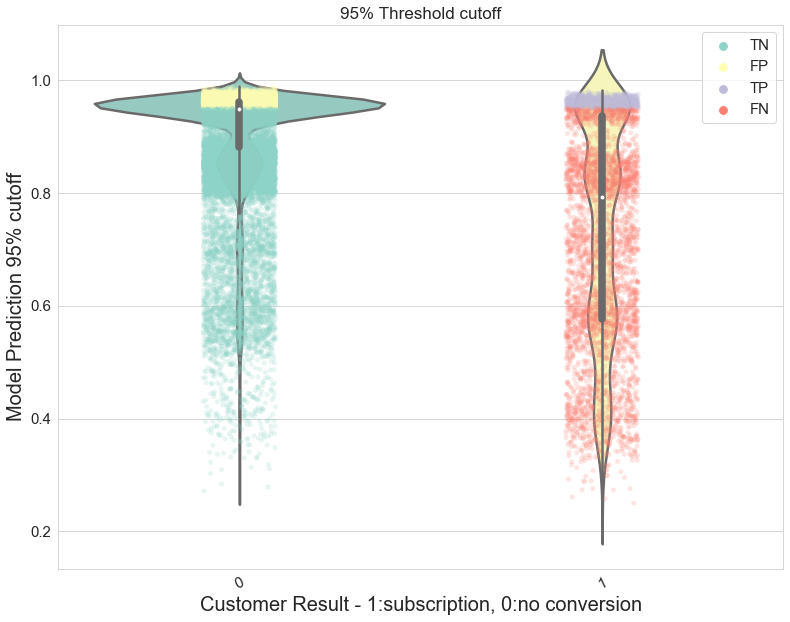

In [170]:
plt.figure(figsize=(13,10))
sns.set_style("whitegrid")
sns.violinplot(x='y_binary', y='ModelPrediction', data=performance, inner="box", linewidth=2.5)
sns.stripplot(x='y_binary', y='ModelPrediction', hue='pred95_confusion', data=performance, jitter=True, alpha= 0.2, zorder=1)

plt.title("95% Threshold cutoff", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.ylabel('Model Prediction 95% cutoff')
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, title_fontsize=15)
plt.show()

In [171]:
print('Report:\n',classification_report(performance.y_binary, performance.pred95))
print("F1 Score:",f1_score(performance.y_binary, performance.pred95))
print('F2 score:',fbeta_score(performance.y_binary, performance.pred95, beta=2.0))
print('AUC score:',roc_auc_score(performance.y_binary, performance.pred95))
print("Acurracy score:",accuracy_score(performance.y_binary, performance.pred95))
print("Precision score:", precision_score(performance.y_binary, performance.pred95))
print("Recall score:",recall_score(performance.y_binary, performance.pred95))
print('confusion Matrix:\n',confusion_matrix(performance.y_binary, performance.pred95))

Report:
               precision    recall  f1-score   support

           0       0.84      0.53      0.65     36548
           1       0.05      0.20      0.08      4640

    accuracy                           0.49     41188
   macro avg       0.44      0.36      0.37     41188
weighted avg       0.75      0.49      0.59     41188

F1 Score: 0.08015908086610694
F2 score: 0.12407660738714091
AUC score: 0.36403071020443595
Acurracy score: 0.49461008060600176
Precision score: 0.05041689827682046
Recall score: 0.1954741379310345
confusion Matrix:
 [[19465 17083]
 [ 3733   907]]


None of the states shows acceptible performance

[[  907  3733]
 [17083 19465]]


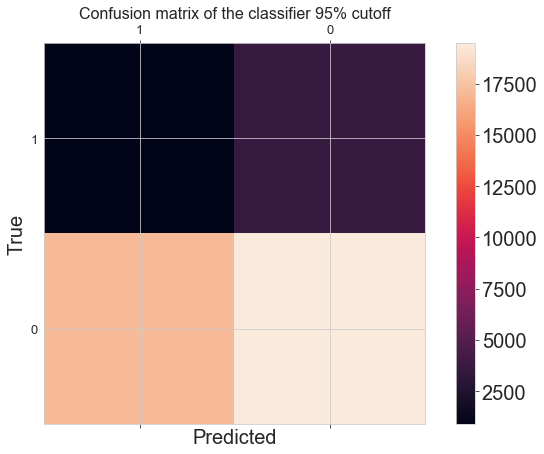

In [172]:
labels = [1,0]
cm = confusion_matrix(performance.y_binary, performance.pred95, labels)
print(cm)

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier 95% cutoff', fontsize=16)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=13)
ax.set_yticklabels([''] + labels, fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# After examining ROC, ROC_AUC, F1, F2, Recall score, we can conclude that the current model is not production quality and we should improve it for higher F1, F2, Recall along with overall performance